# How to Create and Manipulate SQL Databases with Python

Entity relationship Diagram (ERD) for my project :
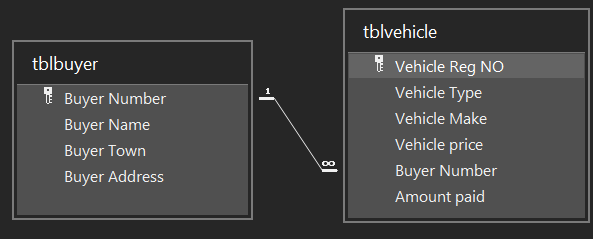

## 1. Import Required Packages

In [1]:
import pandas as pd
# !pip install mysql-connector-python
import mysql.connector
from mysql.connector import Error

## 2. Connect to Server and Create Database

### 2.1 Connect to Server

In [2]:
def create_server_connection(host_name,user_name,password):
    connection=None
    try:
        connection=mysql.connector.connect(
        host=host_name,
        user=user_name,
        password=password)
        print("MySQL Database Connection Successful")
        
    except Error as err:
        print(F"Error: '{err}'")
        
    return connection

password = "Godsfavour@2015" # 1980Mighty*
connection = create_server_connection("localhost", "root", password)

MySQL Database Connection Successful


### 2.2 Create New Database

In [3]:
def create_database(connection,query):
    cursor=connection.cursor()
    try:
        cursor.execute(query)
        print("Database Successfully Created")
    except Error as err:
        print(f"Error: '{err}'")
        
database = "CMC" 
create_database_query="CREATE DATABASE CMC"    
create_database(connection,create_database_query)

Database Successfully Created


### 2.3 Create Database Connection Function

In [4]:
def create_database_connection(host_name,user_name,password,database_name):
    connection=None
    try:
        connection=mysql.connector.connect(
        host=host_name,
        user=user_name,
        password=password,
        database=database)
        print("Connection to database successful!")
    except Error as err:
        print(f"Error: '{err}'")
    return connection

### 2.4 Define Query Execution Function

In [5]:
def execute_query(connection,query):
    cursor=connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query Successful")    
    except Error as err:
        print(f"Error: '{err}'")        

## 3. Create Tables

### 3.1 Create Customer Buyer Table

In [6]:
# Create Customer Table
create_buyer_table= """

                        CREATE TABLE tblbuyer(
                        Buyer_Number VARCHAR(50) PRIMARY KEY,
                        Buyer_Name VARCHAR(50) NOT NULL,
                        Buyer_Town VARCHAR(50),
                        Buyer_Address VARCHAR(50) NOT NULL);

"""

connection=create_database_connection("localhost","root",password,database)
execute_query(connection,create_buyer_table)

Connection to database successful!
Query Successful


### 3.2 Create Customer Vehicle Table

In [7]:
# Create Customer Table
create_vehicle_table= """

                        CREATE TABLE tblvehicle(
                        Vehicle_Reg_NO VARCHAR(50) PRIMARY KEY,
                        Vehicle_Type VARCHAR(50) ,
                        Vehicle_Make VARCHAR(50) NOT NULL,
                        Vehicle_Price INT(50) NOT NULL,
                        Buyer_Number VARCHAR(50),
                        Amount_Paid DECIMAL(50) NOT NULL);

"""

connection=create_database_connection("localhost","root",password,database)
execute_query(connection,create_vehicle_table)

Connection to database successful!
Query Successful


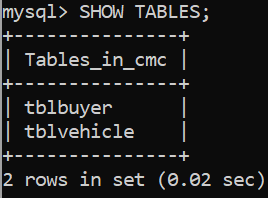

# 3 Define the Relationships

In [8]:
alter_vehicles="""
ALTER TABLE tblvehicle
ADD CONSTRAINT foreignkey_Buyer_Number
FOREIGN KEY (Buyer_Number)
REFERENCES tblbuyer(Buyer_Number)
ON DELETE SET NULL;
"""

connection = create_database_connection("localhost", "root", password, database)
execute_query(connection, alter_vehicles)

Connection to database successful!
Query Successful


## 4. Populating the Tables

### 4.1 Populate Buyers Table

In [9]:
pop_buyers="""
INSERT INTO tblbuyer VALUES
('B001', 'peter','Nakuru','254'),
('B002', 'john','Eldoret','678'),
('B003', 'Ken','Nairobi','963'),
('B004', 'Roy','Nakuru','147'),
('B005', 'Glen','Bungoma','456'),
('B006', 'Phillip','Webuye','789'),
('B007', 'Ken','Kisumu','159'),
('B008', 'Jane','Kisumu','357');
"""

connection = create_database_connection("localhost", "root", password, database)
execute_query(connection, pop_buyers)

Connection to database successful!
Query Successful


            Check  mysql terminal
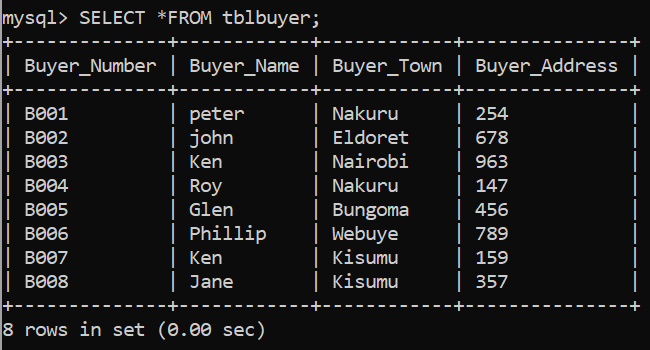

### 4.2 Populate the Vehicle Table

In [10]:
pop_vehicles="""
                    INSERT INTO tblvehicle 
                    (Vehicle_Reg_NO, Vehicle_Type, Vehicle_Make, Vehicle_Price, Buyer_Number, Amount_Paid) VALUES 
                    ('KAJ 001', 'Matatu', 'Nissan', 1200000, 'B001', 800000),
                    ('KAJ 002', 'Bus', 'Mazda', 2400000, 'B002', 2000000),
                    ('KAJ 003', 'Saloon', 'Toyota', 800000, 'B003', 600000),
                    ('KAJ 004', 'Pick up', 'Peugeot', 1000000, 'B004', 700000),
                    ('KAJ 005', 'Lorry', 'Isuzu', 3000000, 'B005', 2000000),
                    ('KAJ 006', 'Pick up', 'Toyota', 1800000, 'B006', 1600000),
                    ('KAJ 007', 'Bus', 'Scania', 7500000, 'B002', 7500000),
                    ('KAJ 008', 'Matatu', 'Toyota', 1300000, 'B003', 1300000),
                    ('KAJ 009', 'Saloon', 'Nissan', 900000, 'B007', 900000),
                    ('KAJ 010', 'Pick up', 'Isuzu', 1500000, 'B001', 1200000),
                    ('KAJ 012', 'Saloon', 'Peugeot', 700000, 'B008', 700000),
                    ('KAJ 013', 'Bus', 'Isuzu', 10000000, 'B006', 9500000),
                    ('KAJ 014', 'Matatu', 'Nissan', 2700000, 'B004', 2700000);

"""

connection = create_database_connection("localhost", "root", password, database)
execute_query(connection, pop_vehicles)

Connection to database successful!
Query Successful


                Check  mysql terminal
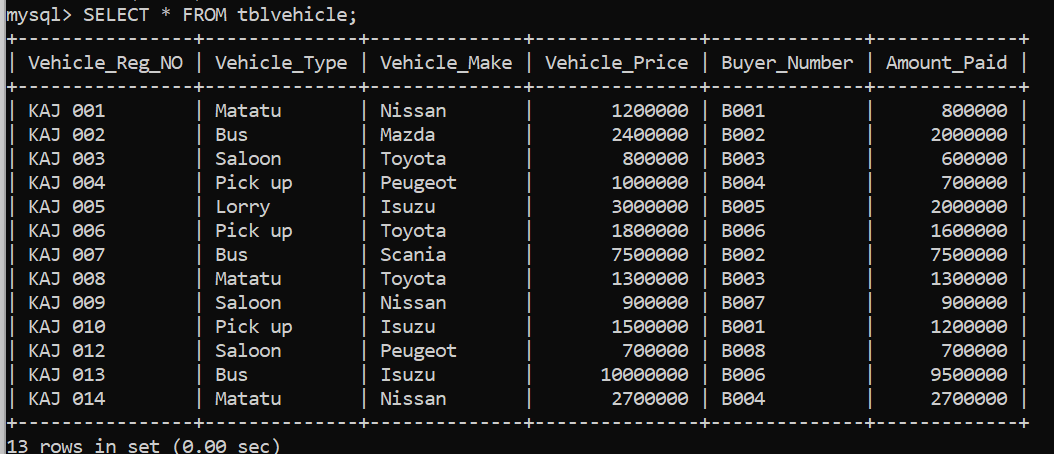

## 5. Reading Data

### 5.1 Define Data Reading Function

In [11]:
def read_query(connection,query):
    cursor=connection.cursor()
    result=None
    try:
        cursor.execute(query)
        result=cursor.fetchall()
        return result
    except Error as err:
        print(f"Error:'{err}'")

### 5.2 Create a query

In [12]:
query_one="""
SELECT * FROM tblvehicle;
"""

connection = create_database_connection("localhost", "root", password, database)
results=read_query(connection,query_one)

for result in results:
    print(result)

Connection to database successful!
('KAJ 001', 'Matatu', 'Nissan', 1200000, 'B001', Decimal('800000'))
('KAJ 002', 'Bus', 'Mazda', 2400000, 'B002', Decimal('2000000'))
('KAJ 003', 'Saloon', 'Toyota', 800000, 'B003', Decimal('600000'))
('KAJ 004', 'Pick up', 'Peugeot', 1000000, 'B004', Decimal('700000'))
('KAJ 005', 'Lorry', 'Isuzu', 3000000, 'B005', Decimal('2000000'))
('KAJ 006', 'Pick up', 'Toyota', 1800000, 'B006', Decimal('1600000'))
('KAJ 007', 'Bus', 'Scania', 7500000, 'B002', Decimal('7500000'))
('KAJ 008', 'Matatu', 'Toyota', 1300000, 'B003', Decimal('1300000'))
('KAJ 009', 'Saloon', 'Nissan', 900000, 'B007', Decimal('900000'))
('KAJ 010', 'Pick up', 'Isuzu', 1500000, 'B001', Decimal('1200000'))
('KAJ 012', 'Saloon', 'Peugeot', 700000, 'B008', Decimal('700000'))
('KAJ 013', 'Bus', 'Isuzu', 10000000, 'B006', Decimal('9500000'))
('KAJ 014', 'Matatu', 'Nissan', 2700000, 'B004', Decimal('2700000'))


### 5.3 Create a list of list from the data extracted from mysql

In [13]:
from_database=[]
for result in results:
    result=list(result)
    from_database.append(result)
from_database

[['KAJ 001', 'Matatu', 'Nissan', 1200000, 'B001', Decimal('800000')],
 ['KAJ 002', 'Bus', 'Mazda', 2400000, 'B002', Decimal('2000000')],
 ['KAJ 003', 'Saloon', 'Toyota', 800000, 'B003', Decimal('600000')],
 ['KAJ 004', 'Pick up', 'Peugeot', 1000000, 'B004', Decimal('700000')],
 ['KAJ 005', 'Lorry', 'Isuzu', 3000000, 'B005', Decimal('2000000')],
 ['KAJ 006', 'Pick up', 'Toyota', 1800000, 'B006', Decimal('1600000')],
 ['KAJ 007', 'Bus', 'Scania', 7500000, 'B002', Decimal('7500000')],
 ['KAJ 008', 'Matatu', 'Toyota', 1300000, 'B003', Decimal('1300000')],
 ['KAJ 009', 'Saloon', 'Nissan', 900000, 'B007', Decimal('900000')],
 ['KAJ 010', 'Pick up', 'Isuzu', 1500000, 'B001', Decimal('1200000')],
 ['KAJ 012', 'Saloon', 'Peugeot', 700000, 'B008', Decimal('700000')],
 ['KAJ 013', 'Bus', 'Isuzu', 10000000, 'B006', Decimal('9500000')],
 ['KAJ 014', 'Matatu', 'Nissan', 2700000, 'B004', Decimal('2700000')]]

### 5.4 Create a dataframe from the data extracted

In [14]:
columns=["Vehicle_Reg_NO","Vehicle_Type","Vehicle_Make","Vehicle_Price","Buyer_Number","Amount_Paid"]
df=pd.DataFrame(from_database,columns=columns)
df

,Vehicle_Reg_NO,Vehicle_Type,Vehicle_Make,Vehicle_Price,Buyer_Number,Amount_Paid
0,KAJ 001,Matatu,Nissan,1200000,B001,800000
1,KAJ 002,Bus,Mazda,2400000,B002,2000000
2,KAJ 003,Saloon,Toyota,800000,B003,600000
3,KAJ 004,Pick up,Peugeot,1000000,B004,700000
4,KAJ 005,Lorry,Isuzu,3000000,B005,2000000
5,KAJ 006,Pick up,Toyota,1800000,B006,1600000
6,KAJ 007,Bus,Scania,7500000,B002,7500000
7,KAJ 008,Matatu,Toyota,1300000,B003,1300000
8,KAJ 009,Saloon,Nissan,900000,B007,900000
9,KAJ 010,Pick up,Isuzu,1500000,B001,1200000


## 6  Updating Records

In [15]:
update="""
UPDATE tblvehicle
SET Vehicle_Type="Bus_62_Seater"
WHERE Vehicle_Type LIKE "%BU%";
"""

connection = create_database_connection("localhost", "root", password, database)
execute_query(connection,update)


query_one="""
SELECT * FROM tblvehicle;
"""

connection = create_database_connection("localhost", "root", password, database)
results=read_query(connection,query_one)

for result in results:
    print(result)

Connection to database successful!
Query Successful
Connection to database successful!
('KAJ 001', 'Matatu', 'Nissan', 1200000, 'B001', Decimal('800000'))
('KAJ 002', 'Bus_62_Seater', 'Mazda', 2400000, 'B002', Decimal('2000000'))
('KAJ 003', 'Saloon', 'Toyota', 800000, 'B003', Decimal('600000'))
('KAJ 004', 'Pick up', 'Peugeot', 1000000, 'B004', Decimal('700000'))
('KAJ 005', 'Lorry', 'Isuzu', 3000000, 'B005', Decimal('2000000'))
('KAJ 006', 'Pick up', 'Toyota', 1800000, 'B006', Decimal('1600000'))
('KAJ 007', 'Bus_62_Seater', 'Scania', 7500000, 'B002', Decimal('7500000'))
('KAJ 008', 'Matatu', 'Toyota', 1300000, 'B003', Decimal('1300000'))
('KAJ 009', 'Saloon', 'Nissan', 900000, 'B007', Decimal('900000'))
('KAJ 010', 'Pick up', 'Isuzu', 1500000, 'B001', Decimal('1200000'))
('KAJ 012', 'Saloon', 'Peugeot', 700000, 'B008', Decimal('700000'))
('KAJ 013', 'Bus_62_Seater', 'Isuzu', 10000000, 'B006', Decimal('9500000'))
('KAJ 014', 'Matatu', 'Nissan', 2700000, 'B004', Decimal('2700000'))


## 7. Delete Records

In [16]:
delete_record="""
DELETE FROM tblvehicle 
WHERE Vehicle_Reg_NO='KAJ 001';
"""
connection=create_database_connection("localhost","root",password,database)
execute_query(connection,delete_record)

Connection to database successful!
Query Successful


In [17]:
query_one="""
SELECT * FROM tblvehicle;
"""

connection = create_database_connection("localhost", "root", password, database)
results=read_query(connection,query_one)

for result in results:
    print(result)

Connection to database successful!
('KAJ 002', 'Bus_62_Seater', 'Mazda', 2400000, 'B002', Decimal('2000000'))
('KAJ 003', 'Saloon', 'Toyota', 800000, 'B003', Decimal('600000'))
('KAJ 004', 'Pick up', 'Peugeot', 1000000, 'B004', Decimal('700000'))
('KAJ 005', 'Lorry', 'Isuzu', 3000000, 'B005', Decimal('2000000'))
('KAJ 006', 'Pick up', 'Toyota', 1800000, 'B006', Decimal('1600000'))
('KAJ 007', 'Bus_62_Seater', 'Scania', 7500000, 'B002', Decimal('7500000'))
('KAJ 008', 'Matatu', 'Toyota', 1300000, 'B003', Decimal('1300000'))
('KAJ 009', 'Saloon', 'Nissan', 900000, 'B007', Decimal('900000'))
('KAJ 010', 'Pick up', 'Isuzu', 1500000, 'B001', Decimal('1200000'))
('KAJ 012', 'Saloon', 'Peugeot', 700000, 'B008', Decimal('700000'))
('KAJ 013', 'Bus_62_Seater', 'Isuzu', 10000000, 'B006', Decimal('9500000'))
('KAJ 014', 'Matatu', 'Nissan', 2700000, 'B004', Decimal('2700000'))


## 8. Restore Deleted Records

In [18]:
restore_record="""
INSERT INTO tblvehicle VALUES
('KAJ 001', 'Matatu', 'Nissan', 1200000, 'B001', 800000);
"""
connection = create_database_connection("localhost", "root", password, database)
execute_query(connection,restore_record)

Connection to database successful!
Query Successful


In [19]:
query_one="""
SELECT * FROM tblvehicle;
"""

connection = create_database_connection("localhost", "root", password, database)
results=read_query(connection,query_one)

for result in results:
    print(result)

Connection to database successful!
('KAJ 001', 'Matatu', 'Nissan', 1200000, 'B001', Decimal('800000'))
('KAJ 002', 'Bus_62_Seater', 'Mazda', 2400000, 'B002', Decimal('2000000'))
('KAJ 003', 'Saloon', 'Toyota', 800000, 'B003', Decimal('600000'))
('KAJ 004', 'Pick up', 'Peugeot', 1000000, 'B004', Decimal('700000'))
('KAJ 005', 'Lorry', 'Isuzu', 3000000, 'B005', Decimal('2000000'))
('KAJ 006', 'Pick up', 'Toyota', 1800000, 'B006', Decimal('1600000'))
('KAJ 007', 'Bus_62_Seater', 'Scania', 7500000, 'B002', Decimal('7500000'))
('KAJ 008', 'Matatu', 'Toyota', 1300000, 'B003', Decimal('1300000'))
('KAJ 009', 'Saloon', 'Nissan', 900000, 'B007', Decimal('900000'))
('KAJ 010', 'Pick up', 'Isuzu', 1500000, 'B001', Decimal('1200000'))
('KAJ 012', 'Saloon', 'Peugeot', 700000, 'B008', Decimal('700000'))
('KAJ 013', 'Bus_62_Seater', 'Isuzu', 10000000, 'B006', Decimal('9500000'))
('KAJ 014', 'Matatu', 'Nissan', 2700000, 'B004', Decimal('2700000'))


## 9. Creating Records from Lists

This method offers a more secure alternative to the simpler execute() method when the database is open to users, as it helps to prevent SQL Injection attacks. It also offers a wide range of use cases, such as logging user activity on a social media app or storing user input into a wiki.

### 9.1 Function - executemany()

In [20]:
def execute_list_queries(connection,sql,val):
    cursor=connection.cursor()
    try:
        cursor.executemany(sql,val)
        connection.commit()
        print("Query Successful")
    except Error as err:
        print(f"Error: '{err}'")

In [21]:
sql="""
        INSERT INTO tblvehicle VALUES
        (%s,%s,%s,%s,%s,%s)
"""

val=[
                    ('KAJ 015', None, 'Peugeot', 7000000, 'B002', 7000000),
                    ('KAJ 016', None, 'Isuzu', 100000000, 'B003', 95000000),
                    ('KAJ 017', None, 'Nissan', 27000000, 'B004', 27000000)
]

connection = create_database_connection("localhost", "root", password, database)
execute_list_queries(connection,sql,val)

Connection to database successful!
Query Successful


In [22]:
query_one="""
SELECT * FROM tblvehicle;
"""

connection = create_database_connection("localhost", "root", password, database)
results=read_query(connection,query_one)

for result in results:
    print(result)

Connection to database successful!
('KAJ 001', 'Matatu', 'Nissan', 1200000, 'B001', Decimal('800000'))
('KAJ 002', 'Bus_62_Seater', 'Mazda', 2400000, 'B002', Decimal('2000000'))
('KAJ 003', 'Saloon', 'Toyota', 800000, 'B003', Decimal('600000'))
('KAJ 004', 'Pick up', 'Peugeot', 1000000, 'B004', Decimal('700000'))
('KAJ 005', 'Lorry', 'Isuzu', 3000000, 'B005', Decimal('2000000'))
('KAJ 006', 'Pick up', 'Toyota', 1800000, 'B006', Decimal('1600000'))
('KAJ 007', 'Bus_62_Seater', 'Scania', 7500000, 'B002', Decimal('7500000'))
('KAJ 008', 'Matatu', 'Toyota', 1300000, 'B003', Decimal('1300000'))
('KAJ 009', 'Saloon', 'Nissan', 900000, 'B007', Decimal('900000'))
('KAJ 010', 'Pick up', 'Isuzu', 1500000, 'B001', Decimal('1200000'))
('KAJ 012', 'Saloon', 'Peugeot', 700000, 'B008', Decimal('700000'))
('KAJ 013', 'Bus_62_Seater', 'Isuzu', 10000000, 'B006', Decimal('9500000'))
('KAJ 014', 'Matatu', 'Nissan', 2700000, 'B004', Decimal('2700000'))
('KAJ 015', None, 'Peugeot', 7000000, 'B002', Decimal(

## 10.  Delete Columns

In [23]:
drop_columns ="ALTER TABLE tblvehicle DROP COLUMN Vehicle_Type"
connection = create_database_connection("localhost", "root", password, database)
execute_query(connection, drop_columns)

Connection to database successful!
Query Successful


In [24]:
query_one= """
                SELECT * FROM tblvehicle;
"""

connection = create_database_connection("localhost", "root", password, database)
results=read_query(connection,query_one)

for result in results:
    print(result)

Connection to database successful!
('KAJ 001', 'Nissan', 1200000, 'B001', Decimal('800000'))
('KAJ 002', 'Mazda', 2400000, 'B002', Decimal('2000000'))
('KAJ 003', 'Toyota', 800000, 'B003', Decimal('600000'))
('KAJ 004', 'Peugeot', 1000000, 'B004', Decimal('700000'))
('KAJ 005', 'Isuzu', 3000000, 'B005', Decimal('2000000'))
('KAJ 006', 'Toyota', 1800000, 'B006', Decimal('1600000'))
('KAJ 007', 'Scania', 7500000, 'B002', Decimal('7500000'))
('KAJ 008', 'Toyota', 1300000, 'B003', Decimal('1300000'))
('KAJ 009', 'Nissan', 900000, 'B007', Decimal('900000'))
('KAJ 010', 'Isuzu', 1500000, 'B001', Decimal('1200000'))
('KAJ 012', 'Peugeot', 700000, 'B008', Decimal('700000'))
('KAJ 013', 'Isuzu', 10000000, 'B006', Decimal('9500000'))
('KAJ 014', 'Nissan', 2700000, 'B004', Decimal('2700000'))
('KAJ 015', 'Peugeot', 7000000, 'B002', Decimal('7000000'))
('KAJ 016', 'Isuzu', 100000000, 'B003', Decimal('95000000'))
('KAJ 017', 'Nissan', 27000000, 'B004', Decimal('27000000'))


## 10.  Delete Table

In [25]:
drop_vehicles = "DROP TABLE tblvehicle;"
connection = create_database_connection("localhost", "root", password, database)
execute_query(connection, drop_vehicles)

Connection to database successful!
Query Successful


In [26]:
query_one="""
SELECT * FROM tblvehicle;
"""

connection = create_database_connection("localhost", "root", password, database)
results=read_query(connection,query_one)

if results:
    for result in results:
        print(result)

Connection to database successful!
Error:'1146 (42S02): Table 'cmc.tblvehicle' doesn't exist'


## 11.  Delete Whole Database

In [27]:
drop_database = "DROP DATABASE CMC;"
connection = create_database_connection("localhost", "root", password, database)
execute_query(connection, drop_database)

Connection to database successful!
Query Successful


In [28]:
pop_vehicles="""
                INSERT INTO tblvehicle 
                (Vehicle_Reg_NO, Vehicle_Type, Vehicle_Make, Vehicle_Price, Buyer_Number, Amount_Paid) VALUES 
                ('KAJ 001', 'Matatu', 'Nissan', 1200000, 'B001', 800000),
                ('KAJ 002', 'Bus', 'Mazda', 2400000, 'B002', 2000000),
                ('KAJ 014', 'Matatu', 'Nissan', 2700000, 'B004', 2700000);

"""

connection = create_database_connection("localhost", "root", password, database)
if connection:
    execute_query(connection, pop_vehicles)

Error: '1049 (42000): Unknown database 'cmc''


In [29]:
# To download, Install nbconvert and also pandoc
# Then in anaconda prompt run

    # D:
    # cd MDA\MISM 5405 DATA ANALYTICS AND KNOWLEDGE ENGINEERING\Assignment
    # jupyter nbconvert --to html CRUD_OPERATIONS_WITH_PYTHON.ipynb 
      # convert the html to pdf-- https://html2pdf.com/
        
    # jupyter nbconvert --to pdf CRUD_OPERATIONS_WITH_PYTHON.ipynb 